In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [27]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [28]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [29]:
df = df.drop(columns = 'society')
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [30]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [31]:
df.dropna(inplace = True)

<Axes: >

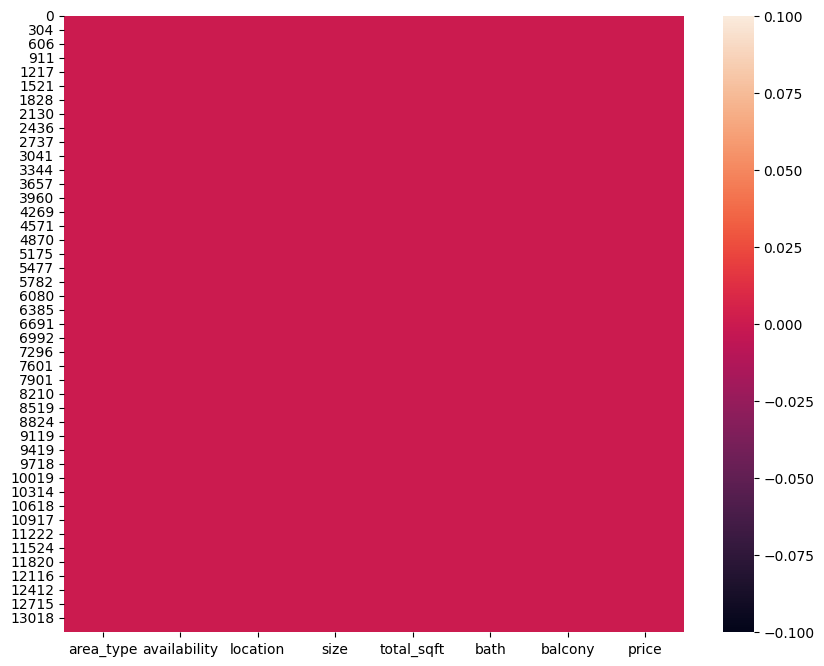

In [32]:
mp.figure(figsize = (10,8))
sns.heatmap(df.isnull())

In [33]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [34]:
x = df[['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony']]
y = df['price']

In [35]:
x.shape,y.shape

((12710, 7), (12710,))

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 1/3,random_state=0)

In [37]:
xtrain,ytrain,xtest,ytest

(                  area_type   availability           location       size  \
 9759         Built-up  Area  Ready To Move            Bagalur      4 BHK   
 1351   Super built-up  Area         19-Oct           Panathur      2 BHK   
 10203  Super built-up  Area  Ready To Move             Hennur      3 BHK   
 12213        Built-up  Area  Ready To Move  Bannerghatta Road  4 Bedroom   
 1968   Super built-up  Area  Ready To Move              Hoodi      2 BHK   
 ...                     ...            ...                ...        ...   
 5118   Super built-up  Area  Ready To Move     Subramanyapura      2 BHK   
 3438   Super built-up  Area  Ready To Move       Malleshwaram      3 BHK   
 10335        Built-up  Area  Ready To Move  Kodichikkanahalli      2 BHK   
 11331            Plot  Area         18-Jul         Whitefield  2 Bedroom   
 2877         Built-up  Area  Ready To Move  Jeevan bima nagar      2 BHK   
 
       total_sqft  bath  balcony  
 9759        2400   4.0      3.0  
 135

In [38]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((8473, 7), (8473,), (4237, 7), (4237,))

In [39]:
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

df = df.dropna(subset=['total_sqft'])

In [40]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00
